### The sane way of making compiling custome dataset for the geez-ocr

In [55]:
import os
import glob
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import pathlib
import shutil


def view(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def vShape(var):
    print(var.shape)
    
def fidel(bet):
    # this method sort and prepare the geez table for standard use from unicode
    deqala1 = ['ቈ','ኈ','ኰ','ዀ','ጐ']
    deqala2 = ['ሏ','ሗ','ሟ','ሧ','ሯ','ሷ','ሿ','ቊ','ቧ','ቯ',
               'ቷ','ቿ','ኊ','ኗ','ኟ','ኧ','ኲ','ዂ','ዟ','ዧ',
               'ዷ','ጇ','ጒ','ጧ','ጯ','ጷ','ጿ','ፏ','ፗ']
    deqala3 =['ቋ','ኋ','ኳ','ዃ','ጓ']
    deqala4 = ['ቌ','ኌ','ኴ','ዄ','ጔ']
    deqala5 = ['ቍ','ኍ','ኵ','ዅ','ጕ']
    
    i=0;fidel = 4608;fideloch = []
    if bet==1: fidel = 4608
    elif bet==2: fidel = 4609
    elif bet==3: fidel = 4610
    elif bet==4: fidel = 4611
    elif bet==5: fidel = 4612
    elif bet==6: fidel = 4613
    elif bet==7: fidel = 4614
    elif bet==8: 
        for word in deqala1: fideloch.append(word)
    elif bet==9: 
        for word in deqala2: fideloch.append(word)
    elif bet==10: 
        for word in deqala3: fideloch.append(word)
    elif bet==11: 
        for word in deqala4: fideloch.append(word)
    elif bet==12: 
        for word in deqala5: fideloch.append(word)
            
    if bet < 8:
        while i<34:
            fideloch.append(chr(fidel))
            if i==8: fidel = fidel+32
            elif i==13 or i==17 or i==24: fidel = fidel+16
            elif i==18: fidel = fidel+16
            elif i==26: fidel = fidel+24
            else: fidel = fidel+8
            i=i+1
    return fideloch

def fidel_form(min_bet, max_bet):
    # Declare a list variable witl all the geez laters in ot according to our form standard
    fidels = []
    for index in range(min_bet,max_bet):
        fidels.append(fidel(index))
    return fidels
#flaten their content
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

def fidel_id(fidel):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the index and return
    return laters.index(fidel)+1

def fidel_name(fidel_id):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the value and return
    return laters[fidel_id-1]

def file_base_name(path):
    return os.path.basename(path).replace('.', ' ')

def rename_dataset(path_str):
    base_name = file_base_name(path_str) 
    path_ext = pathlib.Path(path_str).suffix
    numbers = [int(word) for word in base_name.split() if word.isdigit()]
    return str(fidel_id(base_name[0]))+'_'+str(numbers[0])+path_ext
    
def populate_to_type(model_type):
    # searching script
    path1 = "OCR_dataset\\"+model_type+"_form\\"
    path2 = "OCR_dataset\\"+model_type+"\\"
    file_names = glob.glob(path1+"*.png")
    try:
        if file_names:
            for path in file_names:
                file_name = file_base_name(path)
                directory = path2+str(fidel_id(file_name[0]))
                if (os.path.isdir(directory)):
                    shutil.copy(path,directory+'\\'+rename_dataset(path))
                else:
                    pathlib.Path(path2+str(fidel_id(file_name[0]))).mkdir(parents=True, exist_ok=True)
                    shutil.copy(path,directory+'\\'+rename_dataset(path))
    except NameError as e:
        print(e)
    print('populating compiled! dataset folder is Ready to use!')
        

# print(laters,len(laters),laters.index('ሀ'),laters[286])
# fidel_name(287)
# fidel_id('ሀ')

In [ ]:

populate_to_type('train')
populate_to_type('test')


first phase started!
OCR_dataset/test/1\1_104.png


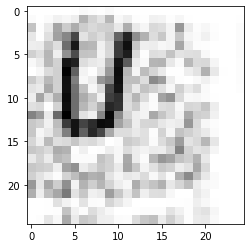

sechond phase started!
1


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.07it/s]


2


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.87it/s]


3


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.42it/s]


4


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.14it/s]


5


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 72.88it/s]


6


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.04it/s]


7


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 87.00it/s]


8


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


9


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


10


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 501.17it/s]


11


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]

12



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


13


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


14


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.54it/s]


15


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.87it/s]


16


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.28it/s]


17


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


18


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


19


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


20


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.39it/s]


21


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


22


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


23


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


24


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.30it/s]


25


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.56it/s]


26


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.42it/s]


27


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.16it/s]


28


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]

29



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.03it/s]


30


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.26it/s]


31


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.42it/s]


32


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


33


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.45it/s]


34


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.14it/s]


35


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 394.57it/s]


36


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.89it/s]


37


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


38


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


39


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.33it/s]


40


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 675.68it/s]


41


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


42


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 90.96it/s]


43


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.26it/s]


44


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


45


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 181.92it/s]


46


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 499.50it/s]


47


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.15it/s]


48


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.07it/s]


49


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.71it/s]


50


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.14it/s]


51


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


52


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.20it/s]


53


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 348.31it/s]


54


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.60it/s]


55


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


56


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.40it/s]


57


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.28it/s]


58


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.40it/s]

59



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.39it/s]


60


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


61


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


62


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.16it/s]


63


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.11it/s]


64


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.16it/s]


65


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 87.01it/s]


66


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 133.42it/s]


67


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.98it/s]


68


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


69


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.09it/s]


70


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


71


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.30it/s]


72


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.39it/s]


73


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.51it/s]


74


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.37it/s]


75


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.14it/s]


76


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.39it/s]


77


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.33it/s]

78



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.25it/s]


79


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 133.38it/s]


80


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.54it/s]


81


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


82


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.48it/s]


83


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.09it/s]


84


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


85


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.66it/s]

86



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 402.18it/s]


87


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.37it/s]


88


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 95.28it/s]


89


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.25it/s]


90


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.54it/s]


91


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]

92



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]

93



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 499.74it/s]


94


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.51it/s]


95


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.42it/s]


96


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


97


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.22it/s]


98


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.42it/s]


99


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.16it/s]


100


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


101


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 222.36it/s]

102



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.94it/s]


103


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.03it/s]


104


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


105


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


106


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]

107



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.18it/s]


108


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.10it/s]


109


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 96.23it/s]


110


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 394.31it/s]


111


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.28it/s]


112


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.18it/s]


113


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


114


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


115


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.14it/s]


116


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.54it/s]


117


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


118


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.01it/s]


119


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 399.76it/s]


120


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


121


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.42it/s]


122


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


123


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 153.94it/s]


124


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.41it/s]


125


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.09it/s]


126


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.57it/s]


127


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.56it/s]


128


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]

129



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.37it/s]


130


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.11it/s]


131


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


132


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


133


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.61it/s]


134


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.56it/s]


135


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.33it/s]


136


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


137


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


138


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 362.53it/s]


139


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 442.86it/s]

140



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 222.36it/s]


141


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.11it/s]


142


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


143


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 47.65it/s]


144


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.33it/s]


145


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


146


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 133.41it/s]


147


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.45it/s]


148


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


149


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.57it/s]


150


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


151


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.39it/s]


152


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


153


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


154


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


155


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


156


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.42it/s]


157


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.10it/s]


158


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


159


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


160


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.12it/s]


161


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.03it/s]


162


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


163


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.07it/s]


164


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


165


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.40it/s]


166


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


167


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.77it/s]


168


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.61it/s]

169



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


170


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.10it/s]


171


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.19it/s]


172


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 125.09it/s]


173


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.04it/s]


174


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


175


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.22it/s]


176


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


177


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 499.92it/s]


178


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 133.43it/s]


179


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.19it/s]


180


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


181


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.13it/s]


182


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.16it/s]


183


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.93it/s]


184


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


185


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.26it/s]


186


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


187


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.22it/s]


188


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.71it/s]


189


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.04it/s]


190


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.87it/s]


191


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.37it/s]


192


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.98it/s]

193



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 501.56it/s]


194


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.57it/s]


195


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.49it/s]


196


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


197


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 315.52it/s]


198


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


199


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]

200



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


201


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.39it/s]


202


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.52it/s]


203


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.51it/s]

204



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.93it/s]


205


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.45it/s]


206


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


207


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


208


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


209


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


210


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.01it/s]


211


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


212


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.18it/s]


213


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.03it/s]

214



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


215


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


216


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.35it/s]


217


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.52it/s]


218


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


219


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.54it/s]


220


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 499.92it/s]


221


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


222


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 491.48it/s]


223


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.98it/s]


224


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.16it/s]


225


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 55.79it/s]


226


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


227


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


228


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 399.76it/s]

229



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.37it/s]


230


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


231


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.87it/s]


232


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 541.51it/s]


233


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.61it/s]


234


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.12it/s]


235


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.50it/s]


236


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.33it/s]


237


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.87it/s]


238


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 102.54it/s]


239


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.14it/s]


240


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


241


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


242


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.09it/s]


243


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


244


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.22it/s]


245


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 651.90it/s]

246



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 399.84it/s]


247


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.24it/s]


248


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.80it/s]


249


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 200.11it/s]


250


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.50it/s]


251


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


252


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


253


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.13it/s]


254


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.10it/s]


255


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


256


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.54it/s]


257


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.19it/s]

258



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.40it/s]


259


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.27it/s]


260


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66.34it/s]


261


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.90it/s]


262


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.90it/s]


263


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.26it/s]


264


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.09it/s]

265



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.10it/s]


266


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.01it/s]


267


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.95it/s]


268


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 83.38it/s]


269


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.24it/s]


270


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.09it/s]


271


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.26it/s]


272


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 222.30it/s]


273


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.33it/s]


274


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.36it/s]


275


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.66it/s]


276


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


277


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.45it/s]


278


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.32it/s]


279


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.71it/s]


280


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.25it/s]


281


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.07it/s]


282


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.57it/s]

283



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.10it/s]


284


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.98it/s]


285


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.22it/s]


286


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1000.91it/s]


287


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.71it/s]


first phase started!
OCR_dataset/train/1\1_107.png


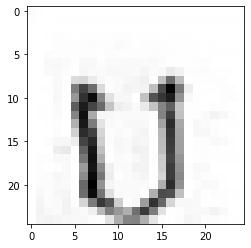

sechond phase started!
1


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.16it/s]


2


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.16it/s]


3


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.51it/s]


4


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 24.53it/s]


5


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.38it/s]


6


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.04it/s]


7


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.27it/s]


8


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.20it/s]


9


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.13it/s]


10


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.66it/s]


11


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.95it/s]


12


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.61it/s]


13


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 19.58it/s]


14


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 23.76it/s]


15


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.64it/s]


16


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 24.18it/s]


17


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 23.25it/s]


18


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 25.11it/s]


19


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.11it/s]


20


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.38it/s]


21


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.01it/s]


22


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 27.65it/s]


23


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.65it/s]


24


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.91it/s]


25


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.04it/s]


26


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.08it/s]


27


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.60it/s]


28


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.79it/s]


29


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.07it/s]


30


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.81it/s]


31


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.86it/s]


32


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.72it/s]


33


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.42it/s]


34


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.55it/s]


35


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.67it/s]


36


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.23it/s]


37


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.08it/s]


38


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.53it/s]


39


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.61it/s]


40


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.31it/s]


41


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 23.32it/s]


42


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.22it/s]


43


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.66it/s]


44


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 25.49it/s]


45


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 27.03it/s]


46


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.08it/s]


47


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.03it/s]


48


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.99it/s]


49


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.58it/s]


50


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.18it/s]


51


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.24it/s]


52


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.04it/s]


53


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.80it/s]


54


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.85it/s]


55


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.71it/s]


56


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.54it/s]


57


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.76it/s]


58


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.86it/s]


59


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.11it/s]


60


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.14it/s]


61


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 53.13it/s]


62


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.11it/s]


63


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.02it/s]


64


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.65it/s]


65


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.52it/s]


66


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.68it/s]


67


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.27it/s]


68


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.43it/s]


69


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.56it/s]


70


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.74it/s]


71


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.51it/s]


72


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.92it/s]


73


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.15it/s]


74


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.30it/s]


75


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.83it/s]


76


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.77it/s]


77


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.90it/s]


78


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.68it/s]


79


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.87it/s]


80


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.19it/s]


81


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.06it/s]


82


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.19it/s]


83


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.71it/s]


84


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.39it/s]


85


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.76it/s]


86


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.08it/s]


87


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.42it/s]


88


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.11it/s]


89


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.06it/s]


90


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.78it/s]


91


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.17it/s]


92


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.27it/s]


93


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.07it/s]


94


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.40it/s]


95


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.64it/s]


96


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.72it/s]


97


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.41it/s]


98


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 16.74it/s]


99


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.34it/s]


100


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.33it/s]


101


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.35it/s]


102


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.26it/s]


103


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.14it/s]


104


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.29it/s]


105


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.78it/s]


106


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.67it/s]


107


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.98it/s]


108


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 24.95it/s]


109


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.64it/s]


110


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 32.24it/s]


111


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.76it/s]


112


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.50it/s]


113


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.91it/s]


114


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.82it/s]


115


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 27.02it/s]


116


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.21it/s]


117


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.82it/s]


118


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.60it/s]


119


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.85it/s]


120


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.59it/s]


121


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 54.26it/s]


122


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.53it/s]


123


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.50it/s]


124


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.27it/s]


125


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.29it/s]


126


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.75it/s]


127


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.49it/s]


128


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.56it/s]


129


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.62it/s]


130


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.77it/s]


131


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.22it/s]


132


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.90it/s]


133


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.35it/s]


134


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.25it/s]


135


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.40it/s]


136


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.18it/s]


137


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.70it/s]


138


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.45it/s]


139


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.68it/s]


140


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.92it/s]


141


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.13it/s]


142


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.08it/s]


143


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.40it/s]


144


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.34it/s]


145


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 54.01it/s]


146


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 52.26it/s]


147


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.63it/s]


148


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.12it/s]


149


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 52.93it/s]


150


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.82it/s]


151


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.48it/s]


152


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.34it/s]


153


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.86it/s]


154


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.02it/s]


155


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.12it/s]


156


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 54.42it/s]


157


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.57it/s]


158


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.79it/s]


159


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.64it/s]


160


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 52.03it/s]


161


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.07it/s]


162


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.88it/s]


163


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.49it/s]


164


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.47it/s]


165


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.37it/s]


166


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 54.37it/s]


167


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 53.05it/s]


168


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.53it/s]


169


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.21it/s]


170


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.43it/s]


171


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.85it/s]


172


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.34it/s]


173


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.69it/s]


174


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.71it/s]


175


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.56it/s]


176


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.83it/s]


177


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.49it/s]


178


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.96it/s]


179


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.93it/s]


180


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.88it/s]


181


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 27.33it/s]


182


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.10it/s]


183


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.29it/s]


184


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.47it/s]


185


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.20it/s]


186


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.70it/s]


187


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.60it/s]


188


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.71it/s]


189


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.10it/s]


190


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.78it/s]


191


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.66it/s]


192


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.81it/s]


193


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.23it/s]


194


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.51it/s]


195


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.68it/s]


196


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.92it/s]


197


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.12it/s]


198


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.25it/s]


199


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.97it/s]


200


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.34it/s]


201


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.00it/s]


202


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.10it/s]


203


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.03it/s]


204


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.72it/s]


205


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.54it/s]


206


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.01it/s]


207


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.40it/s]


208


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.91it/s]


209


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.18it/s]


210


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.48it/s]


211


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.53it/s]


212


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.68it/s]


213


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.29it/s]


214


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.85it/s]


215


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.73it/s]


216


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 53.78it/s]


217


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 54.00it/s]


218


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.87it/s]


219


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.66it/s]


220


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.84it/s]


221


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.62it/s]


222


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.17it/s]


223


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.20it/s]


224


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.52it/s]


225


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.36it/s]


226


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.85it/s]


227


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.01it/s]


228


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 25.02it/s]


229


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.75it/s]


230


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.80it/s]


231


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.90it/s]


232


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.80it/s]


233


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.37it/s]


234


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.81it/s]


235


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.74it/s]


236


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.86it/s]


237


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.03it/s]


238


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.19it/s]


239


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.75it/s]


240


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.68it/s]


241


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.31it/s]


242


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.84it/s]


243


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.95it/s]


244


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 23.26it/s]


245


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 18.30it/s]


246


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.63it/s]


247


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.10it/s]


248


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.96it/s]


249


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.61it/s]


250


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.51it/s]


251


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.66it/s]


252


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.80it/s]


253


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.36it/s]


254


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.23it/s]


255


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.87it/s]


256


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.93it/s]


257


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.61it/s]


258


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 33.64it/s]


259


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.04it/s]


260


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.55it/s]


261


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.57it/s]


262


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 55.29it/s]


263


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.94it/s]


264


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 53.47it/s]


265


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 51.61it/s]


266


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.65it/s]


267


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.93it/s]


268


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 27.72it/s]


269


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.98it/s]


270


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.33it/s]


271


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.43it/s]


272


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.69it/s]


273


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.72it/s]


274


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.71it/s]


275


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.70it/s]


276


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.42it/s]


277


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.49it/s]


278


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.37it/s]


279


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 57.29it/s]


280


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.10it/s]


281


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.61it/s]


282


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 28.48it/s]


283


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.07it/s]


284


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.38it/s]


285


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.97it/s]


286


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.03it/s]


287


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 53.65it/s]


In [44]:
paths = "OCR_dataset/"

def create_x_data(pathx, type_var):
    DATADIR = pathx+type_var
    CATEGORIES = range(1, 288)
    
    print('first phase started!')
    for category in CATEGORIES:  # do calases
        path = os.path.join(DATADIR,str(category))  # create path to clases
        for img in os.listdir(path):  # iterate over each image per clases
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            print(os.path.join(path,img))
            plt.show()  # display!

            break  # we just want one for now so break
        break  #...and one more!
    
    print('first phase ended. \n sechond phase started!')
    data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,str(category))  # create path to each classes
        class_num = CATEGORIES.index(category)+1  # get the classification  (1 - 287).
        # print(class_num)

        for img in tqdm(os.listdir(path)):  # iterate over each image per clases #tqdm shows it in progress bar
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    print('first phase ended.')
    return data

test_dataset = create_x_data(paths,'test/')
train_dataset = create_x_data(paths,'train/')

In [46]:
print(len(test_dataset))
print(len(train_dataset))

574
3731


In [52]:
#look at the array of a single image from the dataset
print(test_dataset[0][0])

[[255 255 255 255 255 254 249 252 254 249 254 255 255 255 255 255 255 255
  255 255 255 255 255 255 255]
 [251 255 251 242 246 239 184 214 229 187 248 239 253 254 242 244 253 246
  254 255 255 255 255 255 254]
 [200 253 235 171 207 179 208 219 212 210 234 180 235 246 219 224 243 158
  236 252 247 253 255 255 251]
 [232 254 225 167 143  83 229 210 222 203 111  53 150 183 223 204 243 202
  245 250 242 252 255 255 251]
 [239 237 201 224 120  40 184 188 241 216  74  32 201 240 238 247 244 172
  235 252 253 255 255 255 251]
 [211 225 187 240 152  89 200 201 243 218  73  45 221 253 224 227 200 229
  225 223 249 255 255 255 251]
 [248 236 189 213  38  48 223 233 238 182  37 104 237 249 186 184 233 250
  190 220 218 245 255 255 252]
 [255 247 221 211  20 108 243 253 229 161  30 187 245 193 216 235 254 254
  239 229 182 233 254 255 252]
 [206 227 190 211  33 136 248 237 157 137  32 195 194 223 147 164 238 253
  255 249 241 251 255 255 252]
 [230 235 175 212  34 123 196 246 219  87  37 203 233 1

In [51]:
#look at the shape of single image from the dataset to see if it's single channel
vShape(test_dataset[0][0])

(25, 25)


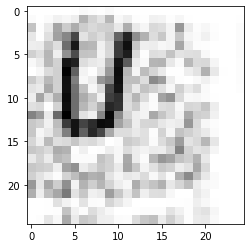

In [56]:
def resize(IMG, IMG_SIZE):
    return cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

def shufle_dataset(dataset):
    random.shuffle(dataset)
    
# shufle both dataset
shufle_dataset(train_dataset)
shufle_dataset(test_dataset)

# view the selectes sample image
view(resize(train_dataset[0][0],25))

In [60]:
def view_sample(dataset, limit):
    for sample in dataset[:limit]:
        print(sample[1])
        
# show samole of the shufled dataset's
print('train dataset sample\n')
view_sample(train_dataset, 10)
print('\n\ntest dataset sample\n')
view_sample(test_dataset, 10)

train dataset sample

110
188
183
132
159
74
28
126
97
140

test dataset sample

180
134
20
81
109
29
245
137
135
46



Training image sample
 Lable:  ኚ


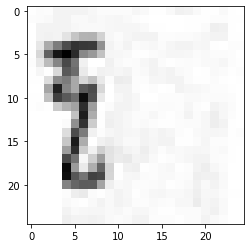


Testing image sample
 Lable:  ቦ


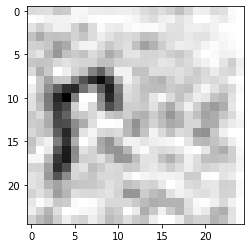

In [65]:
def split_img_and_label(dataset):
    img = []
    lable = []
    for features,label in dataset:
        img.append(features)
        lable.append(label)
    return img, lable


training_img, training_lable = split_img_and_label(train_dataset)
testing_img, testing_lable = split_img_and_label(test_dataset)

# index of sample selector
IMG_INDEX = 50
    
print('\nTraining image sample\n','Lable: ',fidel_name(training_lable[IMG_INDEX]))
view(training_img[IMG_INDEX])
    
print('\nTesting image sample\n','Lable: ',fidel_name(testing_lable[IMG_INDEX]))
view(testing_img[IMG_INDEX])

In [72]:
print('Total amount of Training image: ',len(training_img),'Total amount of Training Lable: ',len(training_lable))
print('Total amount of Testing image: ',len(testing_img),'Total amount of Testing Lable: ',len(testing_lable))

Total amount of Training image:  3731 Total amount of Training Lable:  3731
Total amount of Testing image:  574 Total amount of Testing Lable:  574


In [73]:
def views(image,label):
    print(label)
    plt.imshow(image)
    plt.show()

110


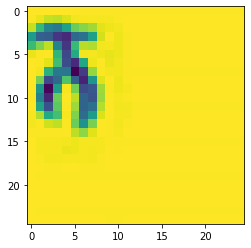

AttributeError: 'list' object has no attribute 'reshape'

In [75]:
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = training_lable[:3444]
test_labels = testing_lable[:574]

views(training_img[0],train_labels[0])

# print(test_labels[:575])

train_images = training_img[:3444].reshape(-1, 25 * 25) / 255.0

np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

test_images = testing_img[:574].reshape(-1, 28 * 28) / 255.0

In [ ]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
# ## We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [36]:
!pip install h5py

### Teaching Time

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# import pickle

# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]

### Progress 1.3

In [18]:
# Create the directory
os.mkdir(path)

In [ ]:
def rename_dataset(path):
    base_name = os.path.basename(path).replace('.', ' ') 
    numbers = [int(word) for word in base_name.split() if word.isdigit()]
    print(base_name[0]+'_'+str(numbers[0]))
    
# searching script
path = "OCR_dataset\\final\\"
text_files = glob.glob(path + "[ሃ]*.png")#, recursive = True)
try:
    if text_files:
        for path in text_files:
            base_name = os.path.basename(path).replace('.', ' ') 
            numbers = [int(word) for word in base_name.split() if word.isdigit()]
            print(base_name[0]+'_'+str(numbers[0]))
            print(path)
except NameError:
     pass
# print(text_files[0])

In [ ]:

# searching script
path = "OCR_dataset\\final\\"
text_files = glob.glob(path + "[ሃ]*.png")#, recursive = True)

print(text_files[0])

In [83]:
# declare the fidel form values
x=fidel_form(1, 13)
#flaten their content
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []
print(flatten(x))

[1, 'ሀ', 2, 'ለ', 3, 'ሐ', 4, 'መ', 5, 'ሠ', 6, 'ረ', 7, 'ሰ', 8, 'ሸ', 9, 'ቀ', 10, 'በ', 11, 'ቨ', 12, 'ተ', 13, 'ቸ', 14, 'ኀ', 15, 'ነ', 16, 'ኘ', 17, 'አ', 18, 'ከ', 19, 'ኸ', 20, 'ወ', 21, 'ዐ', 22, 'ዘ', 23, 'ዠ', 24, 'የ', 25, 'ደ', 26, 'ጀ', 27, 'ገ', 28, 'ጠ', 29, 'ጨ', 30, 'ጰ', 31, 'ጸ', 32, 'ፀ', 33, 'ፈ', 34, 'ፐ', 35, 'ሁ', 36, 'ሉ', 37, 'ሑ', 38, 'ሙ', 39, 'ሡ', 40, 'ሩ', 41, 'ሱ', 42, 'ሹ', 43, 'ቁ', 44, 'ቡ', 45, 'ቩ', 46, 'ቱ', 47, 'ቹ', 48, 'ኁ', 49, 'ኑ', 50, 'ኙ', 51, 'ኡ', 52, 'ኩ', 53, 'ኹ', 54, 'ዉ', 55, 'ዑ', 56, 'ዙ', 57, 'ዡ', 58, 'ዩ', 59, 'ዱ', 60, 'ጁ', 61, 'ጉ', 62, 'ጡ', 63, 'ጩ', 64, 'ጱ', 65, 'ጹ', 66, 'ፁ', 67, 'ፉ', 68, 'ፑ', 69, 'ሂ', 70, 'ሊ', 71, 'ሒ', 72, 'ሚ', 73, 'ሢ', 74, 'ሪ', 75, 'ሲ', 76, 'ሺ', 77, 'ቂ', 78, 'ቢ', 79, 'ቪ', 80, 'ቲ', 81, 'ቺ', 82, 'ኂ', 83, 'ኒ', 84, 'ኚ', 85, 'ኢ', 86, 'ኪ', 87, 'ኺ', 88, 'ዊ', 89, 'ዒ', 90, 'ዚ', 91, 'ዢ', 92, 'ዪ', 93, 'ዲ', 94, 'ጂ', 95, 'ጊ', 96, 'ጢ', 97, 'ጪ', 98, 'ጲ', 99, 'ጺ', 100, 'ፂ', 101, 'ፊ', 102, 'ፒ', 103, 'ሃ', 104, 'ላ', 105, 'ሓ', 106, 'ማ', 107, 'ሣ', 108, 'ራ', 109, 'ሳ', 110, 'ሻ', 111, 'ቃ

In [ ]:
# a script to select odd array index
odd = []
even = []
for i in range(0, len(laters)):
    if i % 2:
        even.append(laters[i])
    else :
        odd.append(laters[i])

# Progress 1.2

In [ ]:
import os
import glob
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random


def fidel_label(bet):
    # this method sort and prepare the geez table for standard use from unicode
    id_number = 1
    deqala1 = ['ቈ','ኈ','ኰ','ዀ','ጐ']
    deqala2 = ['ሏ','ሗ','ሟ','ሧ','ሯ','ሷ','ሿ','ቊ','ቧ','ቯ',
               'ቷ','ቿ','ኊ','ኗ','ኟ','ኧ','ኲ','ዂ','ዟ','ዧ',
               'ዷ','ጇ','ጒ','ጧ','ጯ','ጷ','ጿ','ፏ','ፗ']
    deqala3 =['ቋ','ኋ','ኳ','ዃ','ጓ']
    deqala4 = ['ቌ','ኌ','ኴ','ዄ','ጔ']
    deqala5 = ['ቍ','ኍ','ኵ','ዅ','ጕ']
    
    i=0;fidel = 4608;fideloch = []
    if bet==1: fidel = 4608
    elif bet==2: fidel = 4609;id_number=id_number+34
    elif bet==3: fidel = 4610;id_number=id_number+68
    elif bet==4: fidel = 4611;id_number=id_number+102
    elif bet==5: fidel = 4612;id_number=id_number+136
    elif bet==6: fidel = 4613;id_number=id_number+170
    elif bet==7: fidel = 4614;id_number=id_number+204
    elif bet==8: 
        id_number=id_number+238;
        for word in deqala1: fideloch.append([id_number,word]);id_number=id_number+1
    elif bet==9: 
        id_number=id_number+243;
        for word in deqala2: fideloch.append([id_number,word]);id_number=id_number+1
    elif bet==10: 
        id_number=id_number+272;
        for word in deqala3: fideloch.append([id_number,word]);id_number=id_number+1
    elif bet==11: 
        id_number=id_number+277;
        for word in deqala4: fideloch.append([id_number,word]);id_number=id_number+1
    elif bet==12: 
        id_number=id_number+282;
        for word in deqala5: fideloch.append([id_number,word]);id_number=id_number+1
            
    if bet < 8:
        while i<34:
            fideloch.append([id_number,chr(fidel)]);id_number=id_number+1
            if i==8: fidel = fidel+32
            elif i==13 or i==17 or i==24: fidel = fidel+16
            elif i==18: fidel = fidel+16
            elif i==26: fidel = fidel+24
            else: fidel = fidel+8
            i=i+1
    return fideloch

def fidel_form(min_bet, max_bet):
    # Declare a list variable witl all the geez laters in ot according to our form standard
    fidels = []
    for index in range(min_bet,max_bet):
        fidels.append(fidel(index))
    return fidels
#flaten their content
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

def fidel_id(fidel):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the index and return
    return laters.index('አ')-1

def fidel_name(fidel_id):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the value and return
    return laters[fidel_id+1]

x = fidel_form(1, 13)
# flaten the array into one dimention to make it searchable
laters = flatten(x)

# seek the value and return
# laters[fidel_id+1]

odd = []
even = []
for i in range(0, len(laters)):
    if i % 2:
        even.append(laters[i])
    else :
        odd.append(laters[i])


print(odd)

print(even)

# IN Single Folder - Failed

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import pathlib  # pathlib is in standard library

batch_size = 2
img_height = 28
img_width = 28

directory = "OCR_dataset/"
ds_train = tf.data.Dataset.list_files(str(pathlib.Path(directory + "*.png")))


def process_path(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=1)
    label = tf.strings.split(file_path, "\\")
    label = tf.strings.substr(label, pos=0, len=1)[2]
    label = tf.strings.to_number(label, out_type=tf.int64)
    return image, label


ds_train = ds_train.map(process_path).batch(batch_size)

model = keras.Sequential(
    [
        layers.Input((25, 25, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10


InvalidArgumentError:  slice index 2 of dimension 0 out of bounds.
	 [[node strided_slice (defined at Users\hlina\AppData\Local\Temp/ipykernel_1936/1168272049.py:46) ]]
	 [[IteratorGetNext]] [Op:__inference_train_function_692]

Function call stack:
train_function


# IN Sub-folder 

In [ ]:
# Imports needed
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 28
img_width = 28
batch_size = 2

model = keras.Sequential(
    [
        layers.Input((28, 28, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)

#                      METHOD 1
# ==================================================== #
#             Using dataset_from_directory             #
# ==================================================== #
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "data/mnist_subfolders/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "data/mnist_subfolders/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)


def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y


ds_train = ds_train.map(augment)

# Custom Loops
for epochs in range(10):
    for x, y in ds_train:
        # train here
        pass


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=10, verbose=2)


#                           METHOD 2
# ================================================================== #
#             ImageDataGenerator and flow_from_directory             #
# ================================================================== #

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=5,
    zoom_range=(0.95, 0.95),
    horizontal_flip=False,
    vertical_flip=False,
    data_format="channels_last",
    validation_split=0.0,
    dtype=tf.float32,
)

train_generator = datagen.flow_from_directory(
    "data/mnist_subfolders/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True,
    subset="training",
    seed=123,
)


def training():
    pass


# Custom Loops
for epoch in range(10):
    num_batches = 0

    for x, y in ds_train:
        num_batches += 1

        # do training
        training()

        if num_batches == 25:  # len(train_dataset)/batch_size
            break

# Redo model.compile to reset the optimizer states
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

# using model.fit (note steps_per_epoch)
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=25,
    verbose=2,
    # if we had a validation generator:
    # validation_data=validation_generator,
    # valiation_steps=len(validation_set)/batch_size),
)
